# Global optimization example
Source: https://scipy.github.io/devdocs/tutorial/optimize.html#global-optimization

Global optimization aims to find the global minimum of a function within given bounds, in the presence of potentially many local minima. Typically, global minimizers efficiently search the parameter space, while using a local minimizer (e.g., minimize) under the hood. SciPy contains a number of good global optimizers. Here, we’ll use those on the same objective function, namely the (aptly named) eggholder function.

In [1]:
import numpy as np

def eggholder(x):
    return (-(x[1] + 47) * np.sin(np.sqrt(abs(x[0]/2 + (x[1]  + 47)))) -x[0] * np.sin(np.sqrt(abs(x[0] - (x[1]  + 47)))))

bounds = [(-512, 512), (-512, 512)]

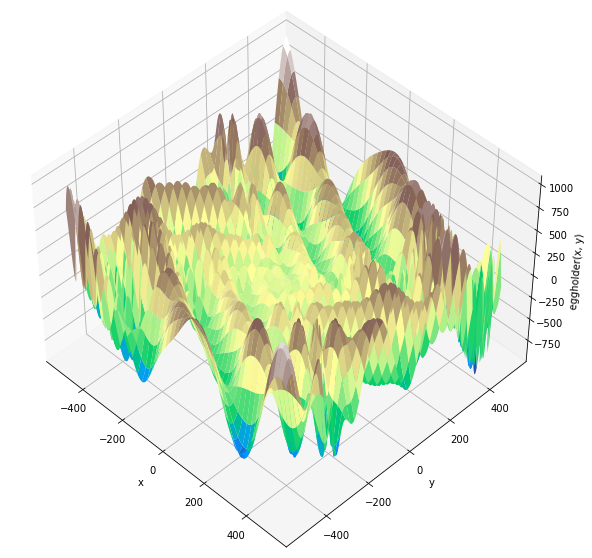

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
x = np.arange(-512, 513)
y = np.arange(-512, 513)
xgrid, ygrid = np.meshgrid(x, y)
xy = np.stack([xgrid, ygrid])
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45, -45)
ax.plot_surface(xgrid, ygrid, eggholder(xy), cmap='terrain')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('eggholder(x, y)')
plt.show()

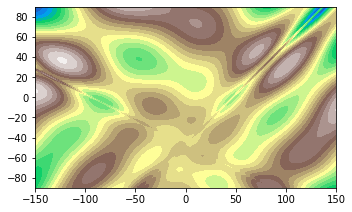

In [19]:
# Contour plot, zoomed-in, for article
x = np.arange(-150, 151)
y = np.arange(-90, 91)
xgrid, ygrid = np.meshgrid(x, y)
xy = np.stack([xgrid, ygrid])
fig = plt.figure(figsize=(5.39, 3.33))
z = eggholder(xy)
plt.contourf(xgrid, ygrid, z, 20, cmap='terrain');

In [4]:
from scipy import optimize
results = dict()
results['shgo'] = optimize.shgo(eggholder, bounds)
results['shgo']

     fun: -935.3379515604948
    funl: array([-935.33795156])
 message: 'Optimization terminated successfully.'
    nfev: 47
     nit: 2
   nlfev: 42
   nlhev: 0
   nljev: 10
 success: True
       x: array([439.48097554, 453.97741501])
      xl: array([[439.48097554, 453.97741501]])

In [5]:
results['DA'] = optimize.dual_annealing(eggholder, bounds)
results['DA']

     fun: -956.9182316219883
 message: ['Maximum number of iteration reached']
    nfev: 4196
    nhev: 0
     nit: 1000
    njev: 65
  status: 0
 success: True
       x: array([482.35320019, 432.87889327])

All optimizers return an OptimizeResult, which in addition to the solution contains information on the number of function evaluations, whether the optimization was successful, and more. For brevity, we won’t show the full output of the other optimizers:

In [6]:
results['DE'] = optimize.differential_evolution(eggholder, bounds)

shgo has a second method, which returns all local minima rather than only what it thinks is the global minimum:

In [7]:
results['shgo_sobol'] = optimize.shgo(eggholder, bounds, n=200, iters=5, sampling_method='sobol')

We’ll now plot all found minima on a heatmap of the function:

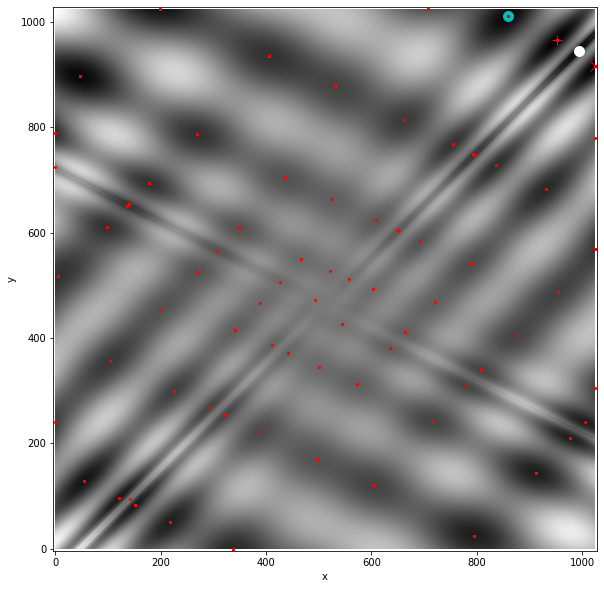

In [8]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
im = ax.imshow(eggholder(xy), interpolation='bilinear', origin='lower', cmap='gray')

ax.set_xlabel('x')
ax.set_ylabel('y')

def plot_point(res, marker='o', color=None):
    ax.plot(512+res.x[0], 512+res.x[1], marker=marker, color=color, ms=10)

plot_point(results['DE'], color='c')  # differential_evolution - cyan
plot_point(results['DA'], color='w')  # dual_annealing.        - white

# SHGO produces multiple minima, plot them all (with a smaller marker size)
plot_point(results['shgo'], color='r', marker='+')
plot_point(results['shgo_sobol'], color='r', marker='x')

for i in range(results['shgo_sobol'].xl.shape[0]):
    ax.plot(512 + results['shgo_sobol'].xl[i, 0],
            512 + results['shgo_sobol'].xl[i, 1],
            'ro', ms=2)

ax.set_xlim([-4, 514*2])
ax.set_ylim([-4, 514*2])
plt.show()